<h1><b> Importing Libraries

In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, precision_score, recall_score
import pandas as pd
import matplotlib.pyplot as plt
import gc
from scipy.stats import uniform

<h1><b> Training the model

In [2]:
X = pd.read_parquet("X_processed.parquet")
y = pd.read_parquet("y_processed.parquet").squeeze()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

del X, y
gc.collect()

0

In [4]:
svm = SVC(
    kernel='rbf',
    C=1.0,
    class_weight='balanced',
    probability=True,
    random_state=42,
    max_iter=1000
)

print("Training SVM model...")
svm.fit(X_train, y_train)

Training SVM model...


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(class_weight='balanced', max_iter=1000, probability=True, random_state=42)

<h1><b> Testing the Model

In [7]:
y_pred = svm.predict(X_test)
y_proba = svm.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_proba)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("ROC-AUC Score:", roc_auc)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

ROC-AUC Score: 0.528217967751045
F1 Score: 0.06762052012009064
Accuracy: 0.0349933958749619
Precision: 0.0349933958749619
Recall: 1.0


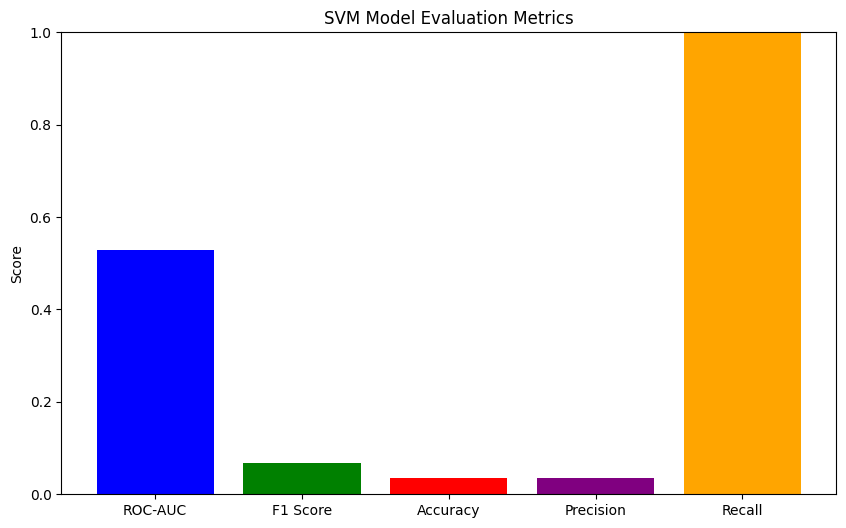

In [6]:
metrics = {
    'ROC-AUC': roc_auc,
    'F1 Score': f1,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall
}

metric_names = list(metrics.keys())
metric_values = list(metrics.values())

plt.figure(figsize=(10, 6))
plt.bar(metric_names, metric_values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.ylabel('Score')
plt.title('SVM Model Evaluation Metrics')
plt.ylim(0, 1)
plt.show()